In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
colored_Image =Image.open('/content/drive/MyDrive/AI&ML/Lenna.png')

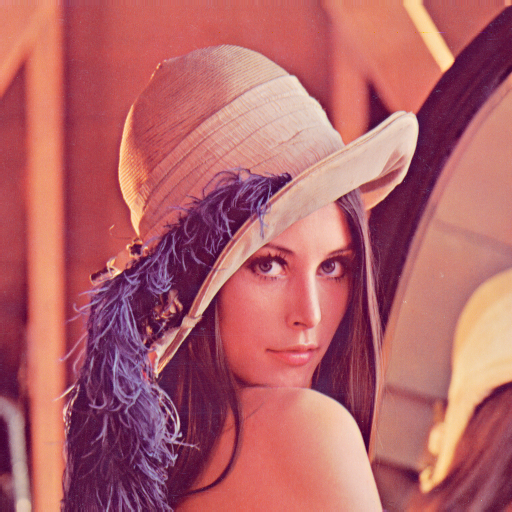

In [ ]:
display(colored_Image)

In [ ]:
print(f"The mode of the image is",colored_Image.mode);
print(f"THe size of the image is",colored_Image.size);

The mode of the image is RGB
THe size of the image is (512, 512)


In [ ]:
import numpy as np
from PIL import Image

image_array = np.zeros((100, 100, 3), dtype=np.uint8)
image_from_array = Image.fromarray(image_array)
image_from_array.show()



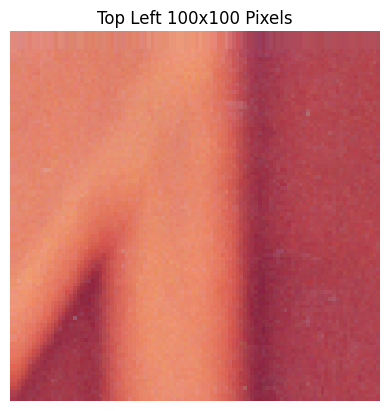

In [ ]:
# Display the top left 100x100 pixels
image_array = np.array(colored_Image)
top_left = image_array[:100, :100]
plt.imshow(top_left)
plt.title('Top Left 100x100 Pixels')
plt.axis('off')
plt.show()


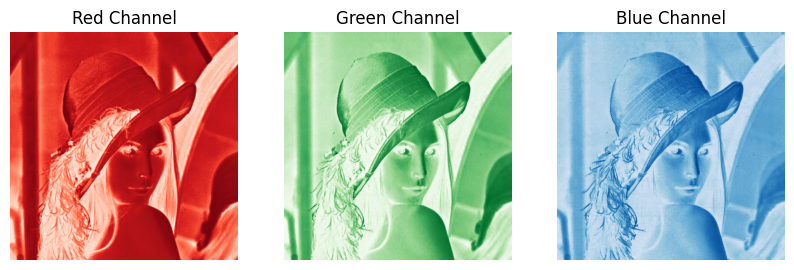

In [ ]:
# Show the three color channels (R, G, B)
red = image_array[:, :, 0]
green = image_array[:, :, 1]
blue = image_array[:, :, 2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')
plt.show()


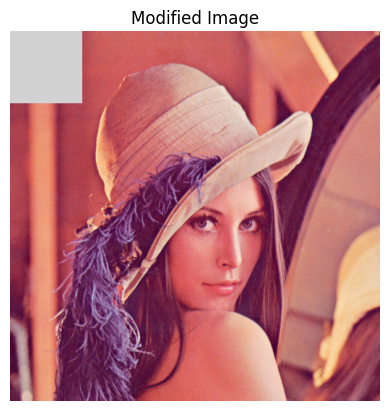

In [ ]:
# Modify the top 100x100 pixels to a light gray color
modified_image = image_array.copy()
modified_image[:100, :100] = 210
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')
plt.show()

**Task** 2

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 511.5, 511.5, -0.5)

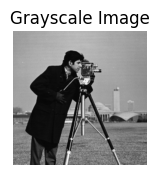

In [ ]:
# 1. Load and display a grayscale image.
image = Image.open("/content/drive/MyDrive/AI&ML/cameraman.png").convert("L")  # Convert to grayscale
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

(-0.5, 149.5, 511.5, -0.5)

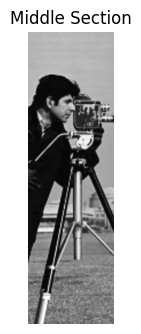

In [ ]:
# 2. Extract and display the middle section of the image (150 pixels)
image_array = np.array(image)
center = image_array.shape[1] // 2  # Find center column
half_width = 75  # 150 pixels total width
cropped_section = image_array[:, center - half_width:center + half_width]
plt.subplot(1, 5, 2)
plt.imshow(cropped_section, cmap='gray')
plt.title("Middle Section")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

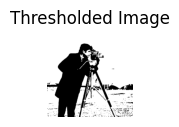

In [ ]:
# 3. Apply a simple threshold to the image
thresholded_image = np.where(image_array < 100, 0, 255).astype(np.uint8)
plt.subplot(1, 5, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

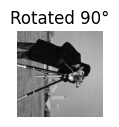

In [ ]:
# 4. Rotate the image 90 degrees clockwise
rotated_image = image.rotate(-90, expand=True)
plt.subplot(1, 5, 4)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated 90°")
plt.axis("off")

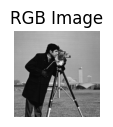

In [ ]:
# 5. Convert the grayscale image to an RGB image
rgb_image = Image.merge("RGB", (image, image, image))
plt.subplot(1, 5, 5)
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

plt.show()


(512, 512)


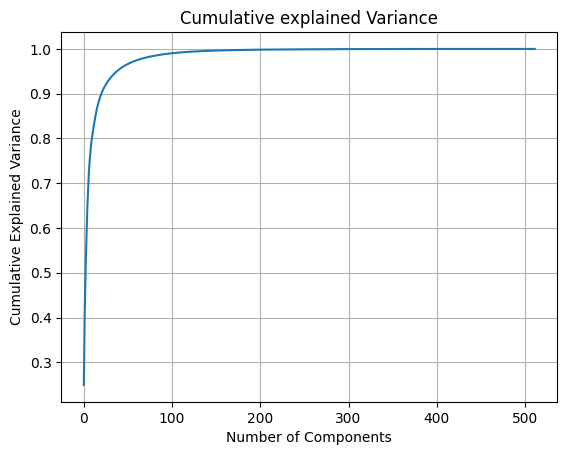

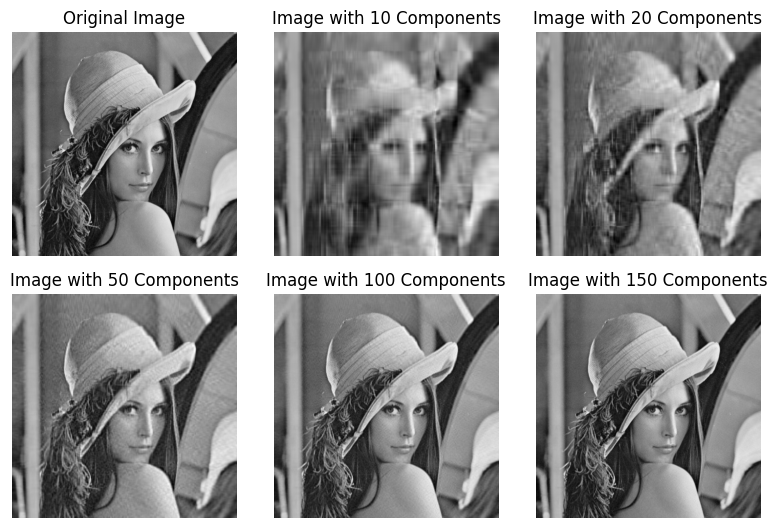

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Load image
original_image = Image.open('/content/drive/MyDrive/AI&ML/Lenna.png').convert("L")

image_array = np.array(original_image)
print(image_array.shape)

height, width = image_array.shape
#data = image_array.reshape(height, width)
data = image_array.copy()

#comput the mean of each column
mean = np.mean(data, axis=0)
#substract mean to center the data
centered_data = data-mean
centered_data.shape

cov_matrix = np.cov(centered_data, rowvar=False)
cov_matrix.shape

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance_ratio = eigenvalues/np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# List of k values to compare
k = [10, 20, 50, 100, 150]

# Create a figure with subplots
plt.figure(figsize=(8,8))
#Original Image
plt.subplot(3, 3, 1)  # Use a 2x3 grid, position 1
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

for i, k in enumerate(k):
    # Select top k principal components
    components = eigenvectors[:, :k]

    # Compress the image
    compressed_data = np.dot(centered_data, components)

    # Decompress the image
    decompressed_data = np.dot(compressed_data, components.T) + mean

    # Plot the decompressed image
    plt.subplot(3, 3, i + 2)
    plt.imshow(decompressed_data, cmap="gray")
    plt.title(f"Image with {k} Components")
    plt.axis("off")

# Show the images
plt.tight_layout()
plt.show()
